In [110]:
import tensorflow
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Embedding ,Dense ,  MaxPooling1D , GlobalMaxPooling1D ,Input

In [111]:
df = pd.read_csv("D:\Downloads\spam.csv" , encoding='cp1250')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [112]:
df = df.drop(['Unnamed: 2' ,"Unnamed: 3"  , "Unnamed: 4"] ,axis =1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [113]:
df.columns = ["labels" , "data"]
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [114]:
#binary labels
df["b_labels"] = df["labels"].map({"ham" :0  , "spam" :1})
Y = df["b_labels"].values
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [115]:
df_train ,df_test,  Y_train  ,  Y_test = train_test_split(df['data'] ,Y  ,test_size = 0.33)

In [116]:
MAX_VOCAB_SIZE =20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequence_train = tokenizer.texts_to_sequences(df_train)
sequence_test = tokenizer.texts_to_sequences(df_test)

In [117]:
word2idx = tokenizer.word_index
V =len(word2idx)
V

7231

In [118]:
data_train = pad_sequences(sequence_train)
print("data_train shape" , data_train.shape)
T =data_train.shape[1]
print('T=', T)
data_test = pad_sequences(sequence_test , maxlen=T)
print("data_test shape" , data_test.shape)

data_train shape (3733, 189)
T= 189
data_test shape (1839, 189)


In [127]:
D=20      # Embeding dimensionality
#  model
i = Input(shape=(T,))
X = Embedding(V+1  ,D)(i)# V+1 because the word indexes start from 1 Not 0 
X  = Conv1D(32 , 3 ,activation="relu")(X)
X = MaxPooling1D(3)(X)
X =Conv1D(64 ,3 , activation="relu")(X)
X = MaxPooling1D(3)(X)
X =Conv1D(128 ,3 , activation="relu")(X)
X = MaxPooling1D()(X)
X = GlobalMaxPooling1D()(X)
X =Dense( 1 , activation= "sigmoid")(X)


In [128]:
model =Model(i , X)

In [129]:
model.compile(loss= tensorflow.keras.losses.binary_crossentropy ,
             optimizer = "adam" ,
             metrics= ["accuracy"])

In [130]:
r  = model.fit(data_train, Y_train ,epochs=6  , validation_data=(data_test , Y_test))


Train on 3733 samples, validate on 1839 samples
Epoch 1/6
3733/3733 [==============================] - 4s 1ms/sample - loss: 0.3717 - accuracy: 0.8693 - val_loss: 0.2737 - val_accuracy: 0.8586
Epoch 2/6
3733/3733 [==============================] - 3s 687us/sample - loss: 0.1395 - accuracy: 0.9376 - val_loss: 0.0795 - val_accuracy: 0.9739
Epoch 3/6
3733/3733 [==============================] - 2s 665us/sample - loss: 0.0255 - accuracy: 0.9925 - val_loss: 0.0665 - val_accuracy: 0.9853
Epoch 4/6
3733/3733 [==============================] - 3s 672us/sample - loss: 0.0056 - accuracy: 0.9992 - val_loss: 0.0704 - val_accuracy: 0.9815
Epoch 5/6
3733/3733 [==============================] - 2s 668us/sample - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0741 - val_accuracy: 0.9831
Epoch 6/6
3733/3733 [==============================] - 2s 659us/sample - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0836 - val_accuracy: 0.9848


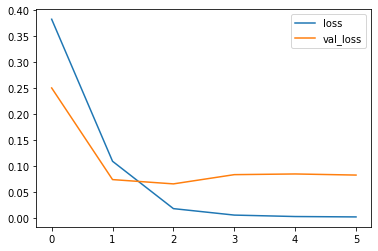

In [109]:
plt.plot(r.history["loss"] , label = "loss")

plt.plot(r.history["val_loss"] , label = "val_loss")
plt.legend()


In [132]:
!python --version

Python 3.7.6
